In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
plt.rcParams["figure.figsize"] = [20,10]

## Importação

Os dados referentes aos anúncios de apartamentos estão no arquivo zapimoveis_SaoPaulo.tsv o qual pode ser lido diretamente pelo pandas por meio do método read_csv com separador '\t'

In [3]:
filename = 'zapimoveis_SaoPaulo.tsv'
df = pd.read_csv(filename, sep='\t', low_memory=False)

## Análise dos campos

In [4]:
for a in ['object', 'int64', 'float64']:
    atrs = list(df.select_dtypes(a))
    print(f'{len(atrs)} atributos do tipo {a}:\n', *atrs, '\n')

16 atributos do tipo object:
 DataHora AnuncioImobiliaria AnuncioSituacao AnuncioTipo AnuncioTitulo AnuncioDescricao AnuncioDataHoraCriacao AnuncioDataHoraAtualizacao EdificacaoDataConstrucao LocalizacaoEstado LocalizacaoCidade LocalizacaoBairro LocalizacaoRua LocalizacaoTipoPrecisao UnidadeTipo UnidadeQuantidadePavimentos 

6 atributos do tipo int64:
 AnuncioIdentificador AreaUtil QuantidadeQuartos QuantidadeBanheiros EdificacaoUnidadePorAndar UnidadeAndar 

210 atributos do tipo float64:
 AreaTotal QuantidadeSuites QuantidadeVagasGaragem EdificacaoAndares LocalizacaoLatitude LocalizacaoLongitude PrecoVenda GARAGE PrecoCondominio PrecoIPTUAnual BARBECUE_GRILL GATED_COMMUNITY SAFETY_CIRCUIT GUEST_PARKING ELECTRIC_GENERATOR ENTRANCE_HALL RECEPTION GOURMET_SPACE GAMES_ROOM DISABLED_ACCESS ELEVATOR ELECTRONIC_GATE CONCIERGE_24H INTERNET_ACCESS CABLE_TV INTERCOM CARPET PETS_ALLOWED AIR_CONDITIONING FURNISHED AMERICAN_KITCHEN BICYCLES_PLACE LAUNDRY COWORKING KITCHEN SERVICE_AREA PARTY_HALL 

In [5]:
df.select_dtypes('object').describe()

,DataHora,AnuncioImobiliaria,AnuncioSituacao,AnuncioTipo,AnuncioTitulo,AnuncioDescricao,AnuncioDataHoraCriacao,AnuncioDataHoraAtualizacao,EdificacaoDataConstrucao,LocalizacaoEstado,LocalizacaoCidade,LocalizacaoBairro,LocalizacaoRua,LocalizacaoTipoPrecisao,UnidadeTipo,UnidadeQuantidadePavimentos
count,631622,631622,631622,631622,631029,628530,631622,631622,151165,631622,631622,631467,476790,631622,5972,336
unique,39306,6696,1,3,268386,543514,603207,525583,125364,1,1,1416,7692,4,7,2
top,2021-06-20T23:30:41.752376,Quinto Andar - Vendas,ACTIVE,STANDARD,São Paulo - Apartamento Padrão - Vila Mariana,-,2021-04-30T13:04:52.248Z,2021-05-25T10:30:23.173Z,2021-01-01T03:00:00Z,São Paulo,São Paulo,Jardim Paulista,Alameda Franca,STREET,STUDIO,DUPLEX
freq,24,18189,631622,561042,6464,3857,9,3485,3461,631622,631622,24208,1977,627318,2964,315


In [6]:
df.select_dtypes('float64').describe()

,AreaTotal,QuantidadeSuites,QuantidadeVagasGaragem,EdificacaoAndares,LocalizacaoLatitude,LocalizacaoLongitude,PrecoVenda,GARAGE,PrecoCondominio,PrecoIPTUAnual,...,CLIMBING_WALL,PASTURE,RIVER,PARKING,CARETAKER_HOUSE,ACLIVE,NORTH_FACING,SANDY,PLAN,VR_SELECTION
count,6.053810e+05,535670.000000,611244.000000,32488.000000,220450.000000,220450.000000,6.313610e+05,41145.0,5.815210e+05,5.192280e+05,...,7.0,4.0,5.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
mean,8.016948e+03,1.393091,1.826488,18.042754,-23.579210,-46.655526,1.370210e+06,1.0,3.374893e+03,1.838110e+03,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.605503e+06,1.178733,4.027656,7.111406,0.044376,0.054394,4.012935e+06,0.0,9.861684e+04,8.932359e+04,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000,0.000000,1.000000,-23.883485,-46.808964,1.500000e+04,1.0,0.000000e+00,0.000000e+00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.200000e+01,1.000000,1.000000,13.000000,-23.610806,-46.685537,4.505000e+05,1.0,5.400000e+02,5.300000e+01,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,9.200000e+01,1.000000,2.000000,18.000000,-23.579534,-46.662363,8.070000e+05,1.0,8.990000e+02,2.500000e+02,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.600000e+02,2.000000,2.000000,23.000000,-23.547199,-46.630482,1.520000e+06,1.0,1.600000e+03,6.800000e+02,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.000000e+09,108.000000,1108.000000,104.000000,-23.400995,-46.374169,1.500000e+09,1.0,3.400000e+07,3.774200e+07,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
df.select_dtypes('int64').describe()

,AnuncioIdentificador,AreaUtil,QuantidadeQuartos,QuantidadeBanheiros,EdificacaoUnidadePorAndar,UnidadeAndar
count,6.316220e+05,631622.000000,631622.000000,631622.000000,631622.000000,631622.000000
mean,2.443362e+09,118.056497,2.571867,2.487602,0.241234,0.386899
std,3.595468e+08,126.594911,0.897158,1.477882,1.303351,2.289039
min,3.569222e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.498819e+09,60.000000,2.000000,1.000000,0.000000,0.000000
50%,2.513382e+09,87.000000,3.000000,2.000000,0.000000,0.000000
75%,2.520786e+09,147.000000,3.000000,3.000000,0.000000,0.000000
max,2.524332e+09,45400.000000,44.000000,20.000000,116.000000,191.000000


## Conversão de atributos

O atributo PredioDataConstrucao será convertido para formato de DateTime

In [8]:
df['EdificacaoDataConstrucao'] = pd.to_datetime(df['EdificacaoDataConstrucao'], errors = 'coerce')
df['EdificacaoIdadeAnos'] = dt.datetime.now().year - df['EdificacaoDataConstrucao'].dt.year

Os atributos PrecoCondominio, PrecoIPTUAnual, PredioUnidadePorAndar com valor 0 serão convertidos para NaN

Os atributos QuantidadeSuites, QuantidadeVagasGaragem com valor NaN serão convertidos em 0.0

In [9]:
for campo in ['PrecoCondominio', 'PrecoIPTUAnual']:
    df[campo] = df[campo].replace({0.0: np.nan})

for campo in ['EdificacaoUnidadePorAndar', 'UnidadeAndar']:
    df[campo] = df[campo].astype(np.float64)
    df[campo] = df[campo].replace({0.0: np.nan})

for campo in ['QuantidadeSuites', 'QuantidadeVagasGaragem']:
    df[campo] = df[campo].fillna(0.0)

Converte campos dummy com valor nan para 0.0

In [10]:
campos = ['GARAGE', 'BARBECUE_GRILL', 'GATED_COMMUNITY', 'SAFETY_CIRCUIT', 'GUEST_PARKING', 'ELECTRIC_GENERATOR', 'ENTRANCE_HALL', 'RECEPTION', 'GOURMET_SPACE', 
'GAMES_ROOM', 'DISABLED_ACCESS', 'ELEVATOR', 'ELECTRONIC_GATE', 'CONCIERGE_24H', 'INTERNET_ACCESS', 'CABLE_TV', 'INTERCOM', 'CARPET', 'PETS_ALLOWED', 'AIR_CONDITIONING', 
'FURNISHED', 'AMERICAN_KITCHEN', 'BICYCLES_PLACE', 'LAUNDRY', 'COWORKING', 'KITCHEN', 'SERVICE_AREA', 'PARTY_HALL', 'PLAYGROUND', 'SPORTS_COURT', 'BACKYARD', 'TEEN_SPACE', 
'GREEN_SPACE', 'GRASS', 'WATCHMAN', 'GARDEN', 'SQUASH', 'TENNIS_COURT', 'ADULT_GAME_ROOM', 'BALCONY', 'DEPOSIT', 'HIKING_TRAIL', 'ALARM_SYSTEM', 'GYM', 'HOME_CINEMA', 
'MOUNTAIN_VIEW', 'POOL', 'SAUNA', 'CLOSET', 'MEETING_ROOM', 'RESTAURANT', 'SPA', 'SECURITY_24_HOURS', 'RECREATION_AREA', 'FOOTBALL_FIELD', 'CHILDRENS_POOL', 'ADULT_POOL', 
'SECURITY_CAMERA', 'SECURITY_CABIN', 'WATER_TANK', 'PATROL', 'PAY_PER_USE_SERVICES', 'SOLARIUM', 'INTEGRATED_ENVIRONMENTS', 'BUILTIN_WARDROBE', 'BEDROOM_WARDROBE', 
'BLINDEX_BOX', 'SOUNDPROOFING', 'LARGE_WINDOW', 'WOOD_FLOOR', 'NATURAL_VENTILATION', 'PANORAMIC_VIEW', 'ALUMINUM_WINDOW', 'LARGE_ROOM', 'COFFEE_SHOP', 'STAIR', 'PORCELAIN', 
'MASSAGE', 'HOME_OFFICE', 'COPA', 'DINNER_ROOM', 'KITCHEN_CABINETS', 'GOURMET_BALCONY', 'NEAR_SCHOOL', 'NEAR_SHOPPING_CENTER', 'NEAR_PUBLIC_TRANSPORT', 'NEAR_HOSPITAL', 
'YOUTH_GAME_ROOM', 'NEAR_ACCESS_ROADS', 'COLD_FLOOR', 'HEATING', 'PET_SPACE', 'SQUARE', 'REDARIO', 'MCMV', 'TREE_CLIMBING', 'FULL_CABLING', 'ESSENTIAL_PUBLIC_SERVICES', 
'COVENTION_HALL', 'EXTERIOR_VIEW', 'FIREPLACE', 'PLATED_GAS', 'LAMINATED_FLOOR', 'LIBRARY', 'WHIRLPOOL', 'TOYS_PLACE', 'SIDE_ENTRANCE', 'PIZZA_OVEN', 'CINEMA', 'FULL_FLOOR', 
'BATHROOM_CABINETS', 'BATHTUB', 'BAR', 'GOURMET_KITCHEN', 'LAKE_VIEW', 'SMALL_ROOM', 'CHILDREN_CARE', 'SERVICE_ENTRANCE', 'NUMBER_OF_FLOORS', 'LARGE_KITCHEN', 'FRUIT_TREES', 
'COVERAGE', 'GAS_SHOWER', 'SANCA', 'HIGH_CEILING_HEIGHT', 'PANTRY', 'LAVABO', 'ARTESIAN_WELL', 'RAISED_FLOOR', 'WALLS_GRIDS', 'RAMP', 'LUNCH_ROOM', 'CORNER_PROPERTY', 
'FENCE', 'VINYL_FLOOR', 'BARBECUE_BALCONY', 'BURNT_CEMENT', 'DRYWALL', 'VEGETABLE_GARDEN', 'POMAR', 'SERVICE_BATHROOM', 'PLANNED_FURNITURE', 'THERMAL_INSULATION', 
'PRIVATE_POOL', 'ORCHID_PLACE', 'DOG_KENNEL', 'DECK', 'EMPLOYEE_DEPENDENCY', 'POOL_BAR', 'ZEN_SPACE', 'SEA_VIEW', 'AQUARIUM', 'COVERED_POOL', 'BEAUTY_CENTER', 'DRESS_ROOM', 
'NEAR_SHOPPING_CENTER_2', 'GOLF_FIELD', 'REVERSIBLE_ROOM', 'HEATED_POOL', 'PLAYGROUND_2', 'DIVIDERS', 'COOKER', 'WALL_BALCONY', 'REFLECTING_POOL', 'GLASS_WALL', 
'BACKGROUND_HOUSE', 'HALF_FLOOR', 'SKATE_LANE', 'SLAB', 'GARAGE_BAND', 'ELECTRICITY', 'WEST_FACING', 'SEWAGE', 'PAVED_STREET', 'SERVICE_ROOM', 'FREEZER', 'DRESS_ROOM2', 
'HOT_TUB', 'PLATIBANDA', 'LAND', 'HELIPAD', 'EDICULE', 'GRAVEL', 'MEZZANINE', 'GEMINADA', 'WELL', 'BARN', 'HEADQUARTERS', 'CORRAL', 'LAKE', 'MARINA', 'CLIMBING_WALL', 
'PASTURE', 'RIVER', 'PARKING', 'CARETAKER_HOUSE', 'ACLIVE', 'NORTH_FACING', 'SANDY', 'PLAN', 'VR_SELECTION']

for campo in campos:
    df[campo] = df[campo].fillna(0)
    df[campo] = df[campo].astype(np.int64)

## Criação de novos atributos

Será criado o atributo PrecoVendaPorAreaUtil que representa efetivamente o preço por m², útil para análises subsequentes:

In [11]:
df['PrecoVendaPorAreaUtil'] = df['PrecoVenda']/df['AreaUtil']

Novos atributos dummy para o tipo da unidade, a maioria, no entanto, não possui tipo. 

In [12]:
df['UnidadeTipo'].value_counts()

STUDIO       2964
KITNET       1109
FLAT          846
PENTHOUSE     704
DUPLEX        289
LOFT           51
TRIPLEX         9
Name: UnidadeTipo, dtype: int64

In [13]:
df = pd.get_dummies(df, columns=['UnidadeTipo'], prefix="TIPO")

Novos atributos dummy para a quantidade de pavimentos

In [14]:
df['UnidadeQuantidadePavimentos'].value_counts()

DUPLEX     315
TRIPLEX     21
Name: UnidadeQuantidadePavimentos, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['UnidadeQuantidadePavimentos'], prefix="QT_PAVIMENTOS")

## Removeremos apartamentos sem informações de latitude e longitude

Removeremos apartamentos sem informações de latitude e longitudeRemoveremos apartamentos com data de construção omissa ou anterior a 1900

In [16]:
df_removidos = df[(pd.isnull(df['EdificacaoDataConstrucao'])) | (df['EdificacaoDataConstrucao'].dt.year < 1900)]
df = pd.concat([df, df_removidos]).drop_duplicates(keep=False)
df_removidos[['AnuncioIdentificador','AnuncioTitulo','AreaUtil', 'PrecoVenda', 'EdificacaoDataConstrucao']]

,AnuncioIdentificador,AnuncioTitulo,AreaUtil,PrecoVenda,EdificacaoDataConstrucao
0,2515210882,Apto CDHU Fazenda do Carmo 4550 JM,60,90000.0,NaT
1,2458757503,APARTAMENTO EM SP SÃO PAULO CHÁCARA SANTA ETEL...,105,85005.0,NaT
2,2512442484,Varanda da Vila,30,NaN,NaT
3,2522546783,Apartamento à venda em São Paulo/SP,39,65000.0,NaT
4,2458595292,IMÓVEL DA CAIXA ECONÔMICA VENDA ONLINE R$ 85.0...,45,85005.0,NaT
...,...,...,...,...,...
631604,2448431027,APARTAMENTO - JARDIM AMÉRICA - SP,420,12000000.0,NaT
631612,2483260386,DUPLEX - CAMPO BELO - SP,685,11000000.0,NaT
631613,2483258801,APARTAMENTO - VILA NOVA CONCEIÇÃO - SP,386,10000000.0,NaT
631614,2448430824,APARTAMENTO - JARDIM AMÉRICA - SP,351,10852000.0,NaT


Removeremos apartamentos sem informações de latitude e longitude

In [17]:
df_removidos = df[(pd.isnull(df['LocalizacaoLatitude'])) | (pd.isnull(df['LocalizacaoLongitude']))]
df = pd.concat([df, df_removidos]).drop_duplicates(keep=False)
df_removidos[['AnuncioIdentificador','AnuncioTitulo','AreaUtil', 'PrecoVenda', 'LocalizacaoLatitude', 'LocalizacaoLatitude']]

,AnuncioIdentificador,AnuncioTitulo,AreaUtil,PrecoVenda,LocalizacaoLatitude,LocalizacaoLatitude
177,2486147810,São Paulo - Studio - Itaquera,34,109956.0,NaN,NaN
213,2516792758,"Apartamento à venda, 2 quartos, 2 vagas, Fazen...",53,110000.0,NaN,NaN
244,2516789332,"Apartamento à venda, 2 quartos, 1 vaga, Fazend...",45,117000.0,NaN,NaN
263,2524046785,São Paulo - Apartamento Padrão - Cidade Tirade...,34,119000.0,NaN,NaN
288,2522409706,São Paulo - Apartamento Padrão - Conjunto Habi...,48,120000.0,NaN,NaN
...,...,...,...,...,...,...
631610,2494943012,SãO PAULO - Padrão - Vila Nova Conceição,539,28000000.0,NaN,NaN
631615,2473096576,DUPLEX - JARDIM AMÉRICA - SP,500,11000000.0,NaN,NaN
631617,2474158732,APARTAMENTO - ITAIM BIBI - SP,665,22000000.0,NaN,NaN
631619,2488021011,São Paulo - Apartamento Padrão - Itaim Bibi,575,17000000.0,NaN,NaN


## Detecção e remoção de outliers

Em primeiro lugar, iremos exibir a distribuição das variáveis PrecoVenda, AreaUtil e QuantidadeQuartos

<AxesSubplot:>

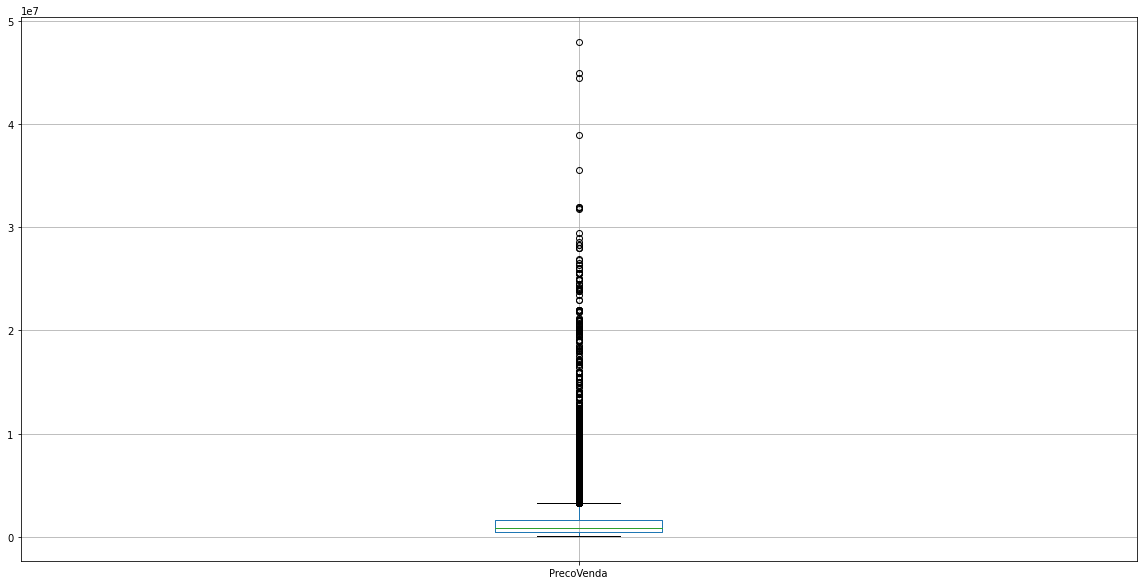

In [18]:
df.boxplot(column=['PrecoVenda'])

<AxesSubplot:>

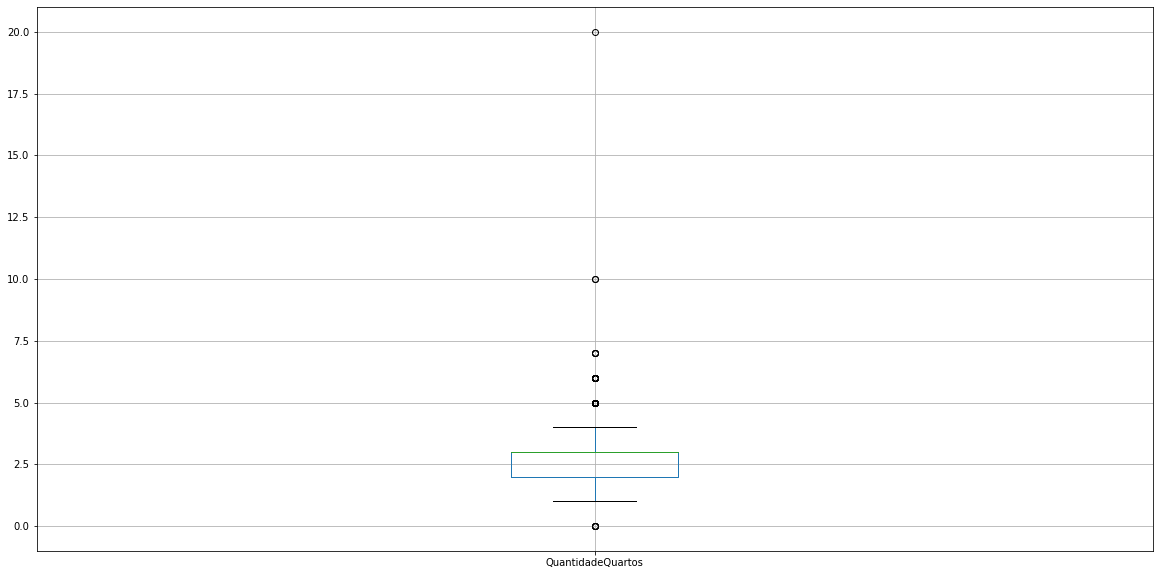

In [19]:
df.boxplot(column=['QuantidadeQuartos'])

<AxesSubplot:>

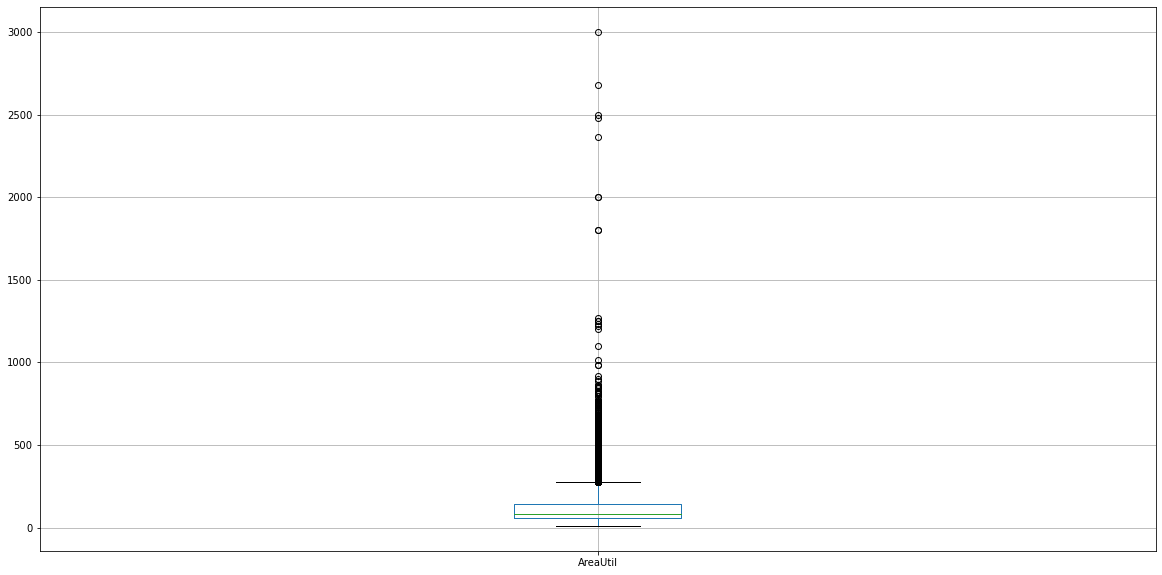

In [20]:
df.boxplot(column=['AreaUtil'])

Em todas as distribuições boxplot exibidas, há uma variação elevada nos valores, o que indica a presença de um número grande de outliers.

Por exemplo, o seguinte apartamento possui 168m² mas 44 quartos.

In [21]:
df[df['Quantid## Variação do preço ao longo dos anos## Variação do preço ao longo dos anos####adeQuartos'] == df['QuantidadeQuartos'].max()][['AnuncioIdentificador','AnuncioTitulo','AreaUtil','QuantidadeQuartos']]

,AnuncioIdentificador,AnuncioTitulo,AreaUtil,QuantidadeQuartos
242527,2516839805,Apartamento para venda possui 60 metros quadra...,60,20


## Remoção de outliers pelo Z-score

Primeiramente, removeremos os apartamentos com PrecoVendaPorAreaUtil mais que 10 desvios padrões distantes da média ou menores que 1000 reais o metro quadrado. Também removeremos apartamentos com mais de 2000m².

In [22]:
df_removidos = df[(abs(stats.zscore(df['PrecoVendaPorAreaUtil'], nan_policy='omit')) > 10) | (df['PrecoVendaPorAreaUtil'] < 1000) | (df['AreaUtil'] > 2000)]
df = pd.concat([df, df_removidos]).drop_duplicates(keep=False)
df_removidos[['AnuncioIdentificador','AnuncioTitulo','AreaUtil', 'PrecoVenda', 'PrecoVendaPorAreaUtil']]

,AnuncioIdentificador,AnuncioTitulo,AreaUtil,PrecoVenda,PrecoVendaPorAreaUtil
41,2520687573,Apartamento Chacara Califórnia - Zona Leste - ...,90,49000.0,544.444444
1190,2509912978,APARTAMENTO A 300 METROS DO METRÔ GIOVANNI GRO...,266,143900.0,540.977444
2518,2518415139,APARTAMENTOS NOVOS- 1 DORMITÓRIO-- 32m2,320,159900.0,499.687500
7937,2496127703,Apartamento para venda tem 2676 metros quadrad...,2680,184901.0,68.992910
33808,2522987478,Apto Sacomã | 2 Quartos | 264 m² | Cond: R$470...,264,250000.0,946.969697
128162,2499440097,"23,62m² á 300m do Metrô Paraíso - Últimas unid...",2362,406000.0,171.888230
236407,2492434837,Apartamento para venda com 695 metros quadrado...,695,620900.0,893.381295
297902,2515865344,Apartamento com 2 Dormitorio(s) localizado(a) ...,1800,760000.0,422.222222
336310,2522881090,"Excelente oportunidade! Apartamento de 68,61 m...",10,870000.0,87000.000000
350531,2511859095,APARTAMENTO LUXO MOEMA - 65M2 - 2 SUITES - NOVO,3000,905000.0,301.666667


Agora removeremos todos os demais apartamentos com campos QuantidadeQuartos, QuantidadeBanheiros, QuantidadeSuites, QuantidadeVagasGaragem por AreaUtil mais que 10 desvios padrões distantes da média:

In [23]:
campos = ['QuantidadeQuartos', 'QuantidadeBanheiros', 'QuantidadeSuites', 'QuantidadeVagasGaragem']

df_removidos = pd.DataFrame()

for campo in campos:
    df_removidos = df_removidos.append(df[(abs(stats.zscore(df[campo]/df['AreaUtil'], nan_policy='omit')) > 10)])
df = pd.concat([df, df_removidos]).drop_duplicates(keep=False)

df_removidos[['AnuncioIdentificador','AnuncioTitulo','QuantidadeQuartos', 'QuantidadeBanheiros', 'QuantidadeSuites', 'QuantidadeVagasGaragem','AreaUtil']]

,AnuncioIdentificador,AnuncioTitulo,QuantidadeQuartos,QuantidadeBanheiros,QuantidadeSuites,QuantidadeVagasGaragem,AreaUtil
823,2523982982,"Apartamento , 39m², 2 quartos, R$ 139.000,00 -...",2,1,0.0,0.0,10
10336,2504268303,Apartamento 2 quartos na Barra Funda Vila Paca...,10,1,0.0,0.0,35
24714,2522214019,Apto São Mateus | 6 Quartos | 10 m² | Cond: R$...,6,7,6.0,6.0,10
112214,2523705695,Apartamento com 3 Dormitorio(s) localizado(a) ...,3,2,1.0,1.0,20
242527,2516839805,Apartamento para venda possui 60 metros quadra...,20,2,0.0,1.0,60
268171,2508716618,Apartamento com 3 Dormitorio(s) localizado(a) ...,3,3,1.0,3.0,20
270050,2492065105,Apartamento para venda com 10 metros quadrados...,2,1,0.0,1.0,10
299643,2522881091,"Lindo apartamento de dois dormitórios, 57,62 m...",2,2,1.0,1.0,10
315245,2507653543,Apartamento com 3 Dormitorio(s) localizado(a) ...,3,3,1.0,2.0,20
355852,2507652605,Apartamento com 3 Dormitorio(s) localizado(a) ...,3,5,3.0,2.0,20


Também removeremos todos os demais apartamentos com campos QuantidadeQuartos, QuantidadeBanheiros, QuantidadeSuites, QuantidadeVagasGaragem com valor maior que 10 e área menor que 500m²

In [24]:
campos = ['QuantidadeQuartos', 'QuantidadeBanheiros', 'QuantidadeSuites', 'QuantidadeVagasGaragem']

df_removidos = pd.DataFrame()

for campo in campos:
    df_removidos = df_removidos.append(df[(df[campo] > 10) & (df['AreaUtil'] < 500)])
df = pd.concat([df, df_removidos]).drop_duplicates(keep=False)

df_removidos[['AnuncioIdentificador','AnuncioTitulo','QuantidadeQuartos', 'QuantidadeBanheiros', 'QuantidadeSuites', 'QuantidadeVagasGaragem','AreaUtil']]

,AnuncioIdentificador,AnuncioTitulo,QuantidadeQuartos,QuantidadeBanheiros,QuantidadeSuites,QuantidadeVagasGaragem,AreaUtil
566603,2508295541,Apto Moema Pássaros impecável,4,19,4.0,3.0,196
397561,2517997216,SAO PAULO - Apartamento Padrão - Vila Carrão,3,3,11.0,0.0,103
263098,2482742575,LINDO APARTAMENTO NA AGUA FRIA PARA VENDA!,3,2,3.0,14.0,112
434616,2488696873,Apartamento para venda possui 150 metros quadr...,4,4,3.0,15.0,150
445227,2513890219,Apartamento para venda tem 126 metros quadrado...,3,3,1.0,12.0,126
447846,2482590088,Apartamento a venda em Santo Amaro com 4 dorms...,4,5,3.0,15.0,159
459607,2482069079,Apartamento para venda possui 132 metros quadr...,3,2,1.0,20.0,132
469899,2450189221,"Apartamento 3 suítes, 2 vagas, 160m², varanda ...",3,5,3.0,16.0,160
485572,2513465973,Cobertura Duplex com 215 M² com 4 suítes no Ta...,4,6,4.0,21.0,215
485880,2520372823,Apartamento para venda tem 110 metros quadrado...,3,4,3.0,11.0,110


## Exportando resultado do processamento

In [25]:
df.to_csv(filename.rsplit('.', 1)[0] + '_processado.tsv', sep='\t', index=False)